In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
import pymongo
import re

In [2]:
def init_browser():
    # @NOTE: Replace the path with your actual path to the chromedriver
    executable_path = {"executable_path": "/usr/local/bin/chromedriver"}
    return Browser("chrome", **executable_path, headless=False)

def soup_url (url):
    browser = init_browser()
    # Visit url
    browser.visit(url)
    time.sleep(1)

    # Scrape page into Soup
    html = browser.html
    soup_url = bs(html, "html.parser")
    
     # Close the browser after scraping
    browser.quit()
    
    return soup_url

def soup_class (soup, class_name):
    
    # Soup data list
    soup_class = soup.find(class_= class_name)
    
    return soup_class 

def soup_class_list (soup, class_name):
   
    # Soup data list
    soup_class_list = soup.find_all(class_= class_name)
    
    return soup_class_list

def text_list (soup_class_list):
    text_list = []
    [text_list.append(record.text.replace("\n", "")) for record in soup_class_list]
    return text_list

In [3]:
# Visit mars.nasa.gov
base_url = "https://oilprice.com"
url_news = "https://oilprice.com/Latest-Energy-News/World-News/"
soup = soup_url(url_news)

In [4]:
page_title = soup.title.text
page_title

'Oil News Today  | OilPrice.com'

In [33]:
image_holder = soup.find_all('img', src=True)
image_holder

[<img alt="Crude oil prices today - Oilprice.com" class="desktop_logo" src="https://d1o9e4un86hhpc.cloudfront.net/a/img/oilprice-logo.png?v=3" title="Oil prices - Oilprice.com"/>,
 <img alt="Crude oil prices today - Oilprice.com" class="mobile_logo" src="https://d1o9e4un86hhpc.cloudfront.net/a/img/common/header/mobile_logo.png?v=3" title="Oil prices - Oilprice.com"/>,
 <img alt="OilPrice GEA" id="main_nav_button" src="https://d1o9e4un86hhpc.cloudfront.net/a/img/common/nav_button_green.png" style="height: 25px;" title="Global Energy Alert"/>,
 <img alt="Link" height="21" src="https://d1o9e4un86hhpc.cloudfront.net/a/img/common/header/link.png" width="21"/>,
 <img alt="Link" src="https://d1o9e4un86hhpc.cloudfront.net/a/img/common/header/link.png"/>,
 <img alt="Link" src="https://d1o9e4un86hhpc.cloudfront.net/a/img/common/header/link.png"/>,
 <img alt="Link" height="21" src="https://d1o9e4un86hhpc.cloudfront.net/a/img/common/header/link.png" width="21"/>,
 <img alt="Link" height="21" src="

In [32]:
link_list = []
image_holder = soup.find_all('img', src=True)
for image in image_holder:
    for link in image:
        link = link["src"].split("src=")[-1]
    link_list.append(link)
link_list

TypeError: string indices must be integers

In [42]:
articles = soup.find_all(class_= "categoryArticle")
title_list = []
date_list = []
excerpt_list = []
author_list = []
link_list = []
for article in articles:
    image_holder = article.find_all('img', src=True)
    for link in image_holder:
        link = link["src"].split("src=")[-1]
    link_list.append(link)
    title = article.find_all(class_= "categoryArticle__title")
    full_date = article.find_all(class_= "categoryArticle__meta")
    date = full_date[0].text.strip().split("|")[0]
    author = full_date[0].text.strip().split("|")[1]
    excerpt = article.find_all(class_= "categoryArticle__excerpt")
    title_list.append(title[0].text.strip())
    date_list.append(date)
    author_list.append(author)
    excerpt_list.append(excerpt[0].text.strip())
author_list

[' Tsvetana Paraskova',
 ' Tsvetana Paraskova',
 ' Charles Kennedy',
 ' Irina Slav',
 ' Julianne Geiger',
 ' Josh Owens',
 ' Tsvetana Paraskova',
 ' Charles Kennedy',
 ' Irina Slav',
 ' Tsvetana Paraskova',
 ' Rystad Energy',
 ' Irina Slav',
 ' Julianne Geiger',
 ' Tsvetana Paraskova',
 ' Tsvetana Paraskova',
 ' Tsvetana Paraskova',
 ' Ag Metal Miner',
 ' Tsvetana Paraskova',
 ' City A.M',
 ' MINING.com']

In [37]:
image_holder = articles[1].find_all('img', src=True)
# img = image_holder.find_all('img', src=True)
for link in image_holder:
    link = link["src"].split("src=")[-1]
link

'\n'

In [83]:
image_holder = articles[1].find(class_= "categoryArticle__imageHolder")
img =image_holder.findAll('img')
#img[0]["src"].split("src=")[-1]

<img alt="Norway’s Oil Strike Could End As Soon As Friday" class="categoryArticle__image lozad opacity_0" data-error_image="https://d1o9e4un86hhpc.cloudfront.net/a/img/content/270x200-default.png" data-src="https://d32r1sh890xpii.cloudfront.net/news/270x200/2020-10-09_zsxvky4oan.jpg" height="200" width="270"/>


<a class="categoryArticle__imageHolder" href="https://oilprice.com/Latest-Energy-News/World-News/Norways-Oil-Strike-Could-End-As-Soon-As-Friday.html" style="background-image:url()"><img alt="Norway’s Oil Strike Could End As Soon As Friday" class="categoryArticle__image lozad opacity_0" data-error_image="https://d1o9e4un86hhpc.cloudfront.net/a/img/content/270x200-default.png" data-src="https://d32r1sh890xpii.cloudfront.net/news/270x200/2020-10-09_zsxvky4oan.jpg" height="200" width="270"/></a>
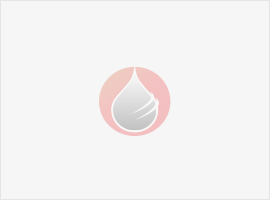

In [72]:
image_holder